<a href="https://colab.research.google.com/github/ashwinkrishna948/bike-prices-prediction-linear-regression/blob/main/Tutorial_2_ID5055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
housing_data = pd.read_csv('housing.csv',usecols = ['longitude','latitude','median_house_value'])
housing_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

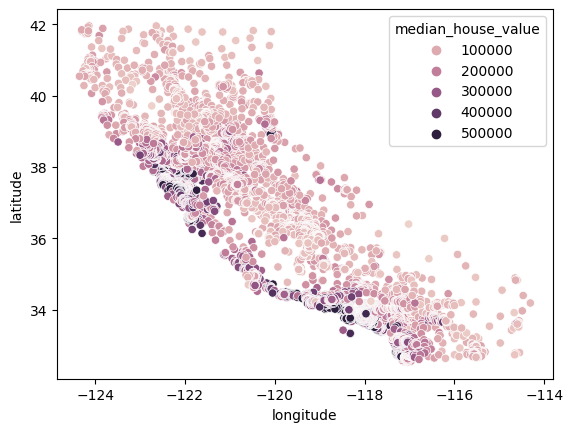

In [2]:
import seaborn as sns
sns.scatterplot(data=housing_data,x='longitude',y='latitude',hue='median_house_value')

In [3]:
#Process to normalize the given data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(housing_data[['latitude','longitude']],housing_data['median_house_value'],test_size=0.33 ,random_state = 70)

In [4]:
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2 , random_state = 0 , n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=2, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

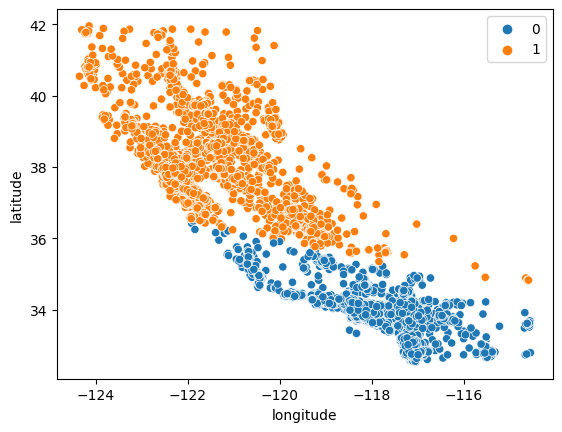

In [6]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [7]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric = 'euclidean')

0.7782638949792386

In [8]:
max = 0
k = 0
for i in range(2,8):
  kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto')
  kmeans.fit(X_train_norm)
  # sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
  if max < silhouette_score(X_train_norm, kmeans.labels_, metric = 'euclidean'):
    max = silhouette_score(X_train_norm, kmeans.labels_, metric = 'euclidean')
    k = i
  print(f"For k = {i} :", silhouette_score(X_train_norm, kmeans.labels_, metric = 'euclidean'))
print(f"The best k is : {k}")

For k = 2 : 0.7782638949792386
For k = 3 : 0.7507358713764554
For k = 4 : 0.702372806264622
For k = 5 : 0.6453702611458678
For k = 6 : 0.6327200693773732
For k = 7 : 0.6430584969007306
The best k is : 2
